# 포트폴리오-2. 서울, 부산 상권분석

## 1. 기본 설정

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


warnings.filterwarnings(action='ignore')
plt.rc('font',family='Malgun Gothic')  
plt.rc('axes',unicode_minus=False)

## 2. 데이터 로드 및 서울, 부산 데이터프레임 합치기

In [2]:
df_seoul = pd.read_csv('data/소상공인/소상공인시장진흥공단_상가(상권)정보_서울_202106.csv')
df_busan = pd.read_csv('data/소상공인/소상공인시장진흥공단_상가(상권)정보_부산_202106.csv')

In [3]:
np.all(df_seoul.columns == df_busan.columns)

True

두 데이터 모두 같은 열을 가지고 있으므로 열 기준으로 병합이 가능

In [4]:
df = pd.concat([df_seoul,df_busan], axis=0)

In [5]:
df.index = range(len(df))

## 3. df 데이터 프레임의 결측치 확인 및 시각화

In [6]:
na_by_col = df.isna().sum().reset_index()

In [7]:
na_by_col.columns = ['columns','na_values']

In [8]:
na_by_col_sorted = na_by_col.sort_values(by= ['na_values'],axis=0,ascending=False)
na_by_col_sorted.index = range(len(na_by_col))

In [9]:
na_by_col_sorted.head(3)

,columns,na_values
0,호정보,452595
1,동정보,412599
2,건물부번지,392969


In [10]:
na_by_col_sorted.tail(3)

,columns,na_values
36,상권업종대분류명,0
37,상권업종대분류코드,0
38,위도,0


결측치 갯수 상위3개와 하위 3개를 확인해보았다

In [11]:
df[df.isna()==False].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452595 entries, 0 to 452594
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     452595 non-null  int64  
 1   상호명        452593 non-null  object 
 2   지점명        73451 non-null   object 
 3   상권업종대분류코드  452595 non-null  object 
 4   상권업종대분류명   452595 non-null  object 
 5   상권업종중분류코드  452595 non-null  object 
 6   상권업종중분류명   452595 non-null  object 
 7   상권업종소분류코드  452595 non-null  object 
 8   상권업종소분류명   452595 non-null  object 
 9   표준산업분류코드   409688 non-null  object 
 10  표준산업분류명    409688 non-null  object 
 11  시도코드       452595 non-null  int64  
 12  시도명        452595 non-null  object 
 13  시군구코드      452595 non-null  int64  
 14  시군구명       452595 non-null  object 
 15  행정동코드      452595 non-null  int64  
 16  행정동명       452182 non-null  object 
 17  법정동코드      452595 non-null  int64  
 18  법정동명       452595 non-null  object 
 19  지번코드       452595 non-n

결측치가 없는 데이터들의 데이터 타입과 메모리 사용량 확인

dtypes: float64(6), int64(11), object(22)

memory usage: 134.7+ MB

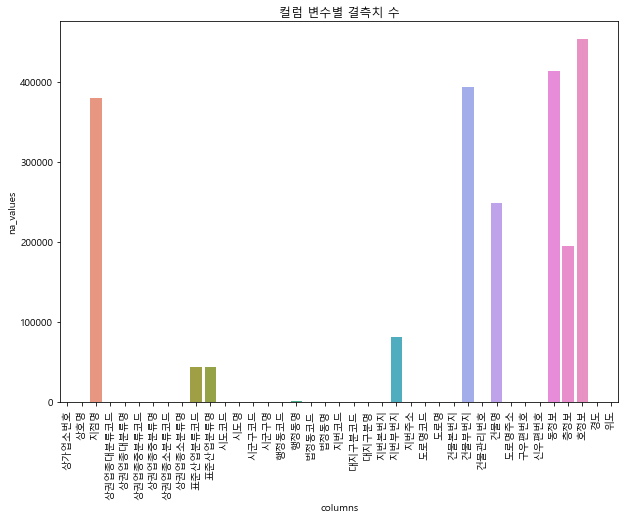

In [167]:
plt.figure(figsize=(10,7))
sns.barplot(data = na_by_col, x='columns',y='na_values',ci=False)
plt.xticks(rotation=90)
plt.title('컬럼 변수별 결측치 수')
plt.show()

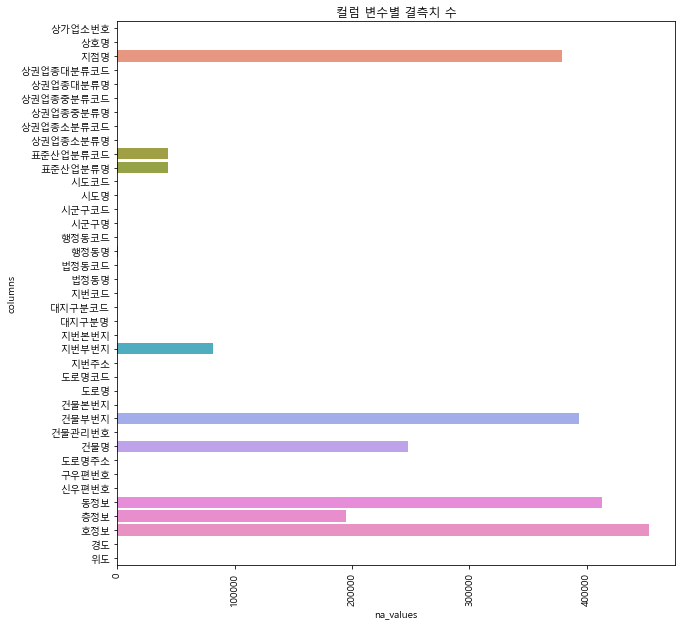

In [166]:
plt.figure(figsize=(10,10))
sns.barplot(data = na_by_col, x='na_values',y='columns',ci=False)
plt.xticks(rotation=90)
plt.title('컬럼 변수별 결측치 수')
plt.show()

컬럼 변수에 따른 결측치 수를 도식화함  (sort 하기전의 바 차트)

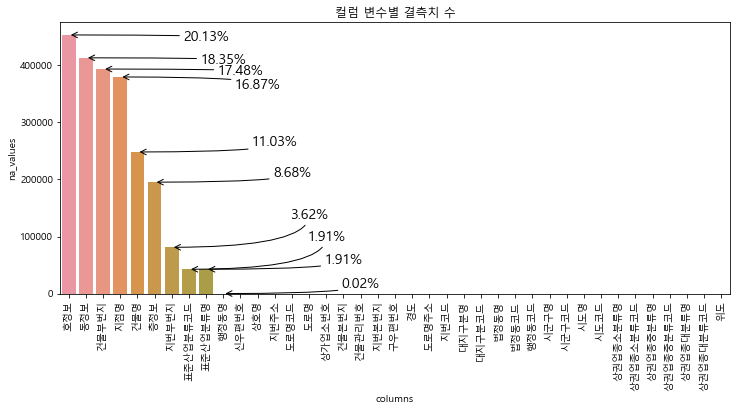

In [17]:
plt.figure(figsize=(12,5))
sns.barplot(data = na_by_col_sorted, x='columns',y='na_values',ci=False)
plt.xticks(rotation=90)

for x_coord, y_coord in enumerate(na_by_col_sorted.iloc[0:10,1]):
    if(x_coord <3):
        plt.annotate('{:.2f}%'.format(y_coord/sum(na_by_col['na_values'])*100), 
                 xy=(x_coord,y_coord), xytext=(x_coord+8,y_coord-10000),
                 fontsize=14, ha='center',arrowprops=dict(arrowstyle='->',connectionstyle='angle3'))
    elif(x_coord==3):
        plt.annotate('{:.2f}%'.format(y_coord/sum(na_by_col['na_values'])*100), 
                 xy=(x_coord,y_coord), xytext=(x_coord+8,y_coord-20000),
                 fontsize=14, ha='center',arrowprops=dict(arrowstyle='->',connectionstyle='angle3'))
    elif(x_coord==6):
        plt.annotate('{:.2f}%'.format(y_coord/sum(na_by_col['na_values'])*100), 
                 xy=(x_coord,y_coord), xytext=(x_coord+8,y_coord+50000),
                 fontsize=14, ha='center',arrowprops=dict(arrowstyle='->',connectionstyle='angle3'))
    
    elif(x_coord==7):
        plt.annotate('{:.2f}%'.format(y_coord/sum(na_by_col['na_values'])*100), 
                 xy=(x_coord,y_coord), xytext=(x_coord+8,y_coord+50000),
                 fontsize=14, ha='center',arrowprops=dict(arrowstyle='->',connectionstyle='angle3'))
    elif(x_coord==10):
        plt.annotate('{:.2f}%'.format(y_coord/sum(na_by_col['na_values'])*100), 
                 xy=(x_coord,y_coord), xytext=(x_coord+8,y_coord+50000),
                 fontsize=14, ha='center',arrowprops=dict(arrowstyle='->',connectionstyle='angle3'))
    else: 
        plt.annotate('{:.2f}%'.format(y_coord/sum(na_by_col['na_values'])*100), 
                 xy=(x_coord,y_coord), xytext=(x_coord+8,y_coord+10000),
                 fontsize=14, ha='center',arrowprops=dict(arrowstyle='->',connectionstyle='angle3'))

plt.title('컬럼 변수별 결측치 수')
plt.show()

각 칼럼별 결측치 갯수를 도식화 하고, 전체에서 몇 %의 결측치를 찾아내는지 표시하였다

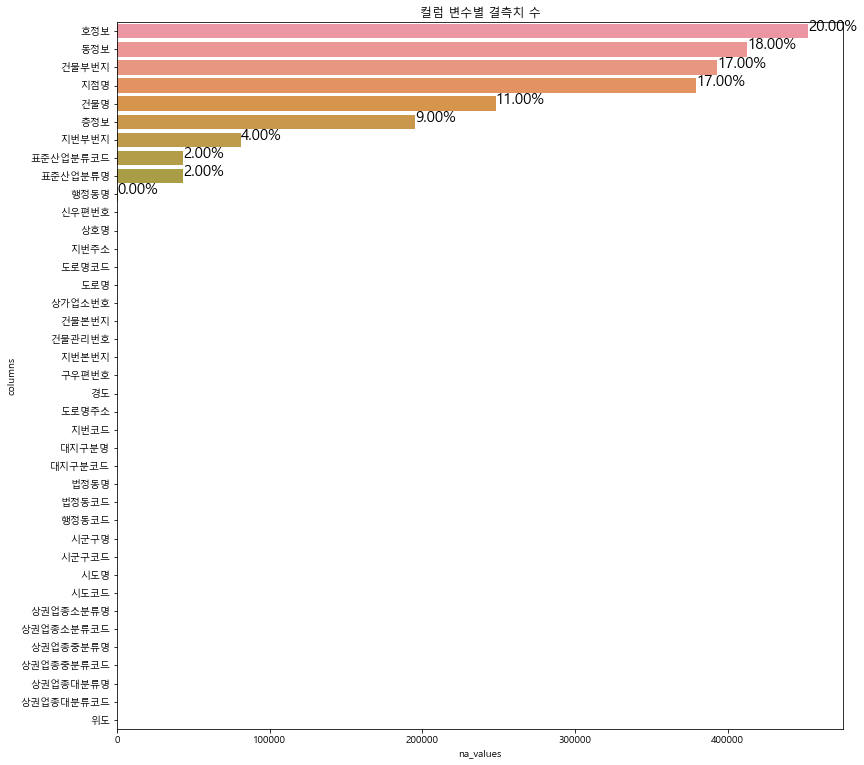

In [18]:
plt.figure(figsize=(13,13))
sns.barplot(data = na_by_col_sorted, x='na_values',y='columns',ci=False)

for x_coord, y_coord in enumerate(na_by_col_sorted.iloc[0:10,1]):
    plt.text(y_coord,x_coord,'{:.2f}%'.format(y_coord/sum(na_by_col_sorted['na_values'])*100),fontsize=15)

plt.title('컬럼 변수별 결측치 수')
plt.show()

전 그래프와 같은 결측치 파악 바 차트이다. 가로로 눞혀서 그려서 순위를 파악하기 쉬움

In [484]:
na_value_exist = na_by_col[na_by_col.na_values>0]
na_value_exist

,columns,na_values
1,상호명,2
2,지점명,379144
9,표준산업분류코드,42907
10,표준산업분류명,42907
16,행정동명,413
23,지번부번지,81341
28,건물부번지,392969
30,건물명,247975
33,신우편번호,11
34,동정보,412599


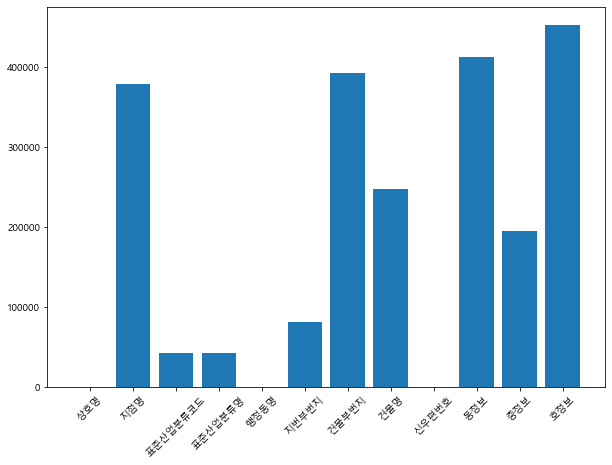

In [485]:
plt.figure(figsize=(10,7))
plt.bar(x=na_value_exist['columns'],height=na_value_exist['na_values'])
plt.xticks(rotation=45)
plt.show()

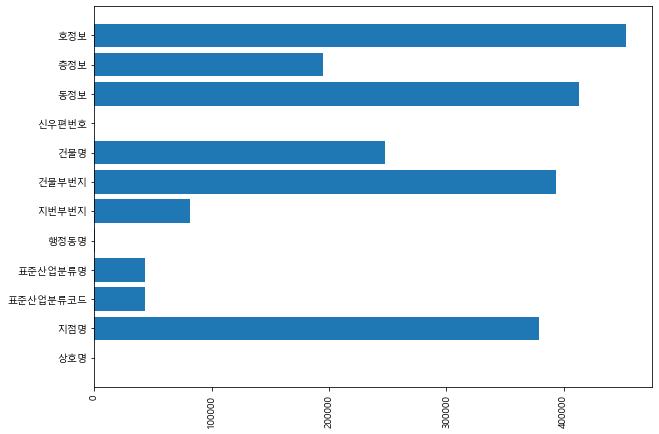

In [486]:
plt.figure(figsize=(10,7))
plt.barh(y=na_value_exist['columns'],width=na_value_exist['na_values'])
plt.xticks(rotation=90)
plt.show()

결측치가 있는 변수들만을 포함하여 시각화 해보았다 (정렬전) 

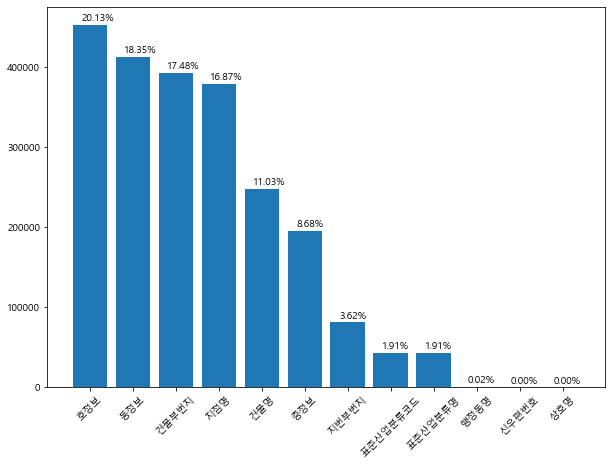

In [492]:
na_by_exist_sorted = na_by_col_sorted[na_by_col_sorted.na_values>0]

plt.figure(figsize=(10,7))
plt.bar(x=na_by_exist_sorted['columns'],height=na_by_exist_sorted['na_values'])

for x_coord, y_coord in enumerate(na_by_exist_sorted.na_values):
    plt.text(x_coord-0.2,y_coord+5000,'{:.2f}%'.format(y_coord/sum(na_by_exist_sorted.na_values)*100))

plt.xticks(rotation=45)
plt.show()

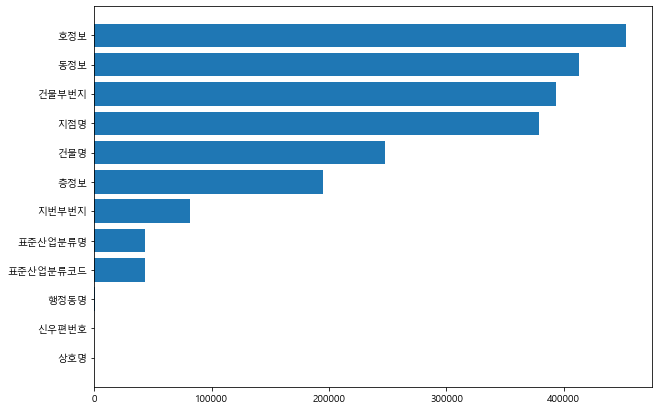

In [495]:
na_by_col_sorted_ascending = na_by_col.sort_values(by='na_values')

plt.figure(figsize=(10,7))
plt.barh(y=na_by_col_sorted_ascending[na_by_col_sorted_ascending.na_values>0]['columns'],width=na_by_col_sorted_ascending[na_by_col_sorted_ascending.na_values>0]['na_values'])

plt.show()

결측치가 포함된 열들만 추려서 변수에 따른 결측치수 바차트를 그려보았다 (정렬후)

## 4. 사용하지 않을 컬럼 제거

결측치 포함 수 상위 9개 컬럼을 일단 제외한다

In [29]:
columns_to_remove = na_by_col_sorted.iloc[0:9]['columns']

df.drop(columns_to_remove,axis=1,inplace=True)

코드 또는 번호가 컬럼명에 포함된 변수들 또한 무의미하므로 제외한다

In [30]:
df.drop(df.columns[df.columns.str.contains('코드'or'번호')],axis=1,inplace=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452595 entries, 0 to 452594
Data columns (total 20 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상가업소번호    452595 non-null  int64  
 1   상호명       452593 non-null  object 
 2   상권업종대분류명  452595 non-null  object 
 3   상권업종중분류명  452595 non-null  object 
 4   상권업종소분류명  452595 non-null  object 
 5   시도명       452595 non-null  object 
 6   시군구명      452595 non-null  object 
 7   행정동명      452182 non-null  object 
 8   법정동명      452595 non-null  object 
 9   대지구분명     452595 non-null  object 
 10  지번본번지     452595 non-null  int64  
 11  지번주소      452595 non-null  object 
 12  도로명       452595 non-null  object 
 13  건물본번지     452595 non-null  int64  
 14  건물관리번호    452595 non-null  object 
 15  도로명주소     452595 non-null  object 
 16  구우편번호     452595 non-null  int64  
 17  신우편번호     452584 non-null  float64
 18  경도        452595 non-null  float64
 19  위도        452595 non-null  float64
dtypes: f

In [32]:
print('칼럼 제거 전 메모리 사용량 :134.7+ MB')
print('칼럼 제거 전 변수 개수 : 39개\n')
print('칼럼 제거 후 메모리 사용량 : 69.1+ MB')
print('칼럼 제거 전 변수 개수 : 20개')

칼럼 제거 전 메모리 사용량 :134.7+ MB
칼럼 제거 전 변수 개수 : 39개

칼럼 제거 후 메모리 사용량 : 69.1+ MB
칼럼 제거 전 변수 개수 : 20개


## 5. 상호명 필드만 가져온 후 종류별 데이터수 파악 & 도로명 주소 가져오기

In [33]:
df['상호명'] # loc, iloc 이용 안하고 추출

0              비지트
1             쓰리에프
2               채움
3            호구의주방
4               다향
            ...   
452590       일광카메라
452591       파워씨마트
452592    철마청년협동조합
452593        소금주방
452594         에이유
Name: 상호명, Length: 452595, dtype: object

In [34]:
df_store_name = df.loc[:,'상호명'].value_counts().reset_index()
df_store_name.columns = ['상호명','개수']
df_store_name.head(10)

,상호명,개수
0,CU,2357
1,GS25,1848
2,세븐일레븐,1259
3,카페,862
4,이마트,607
5,이디야커피,471
6,스타벅스,429
7,이마트24,392
8,나,355
9,개별용달,352


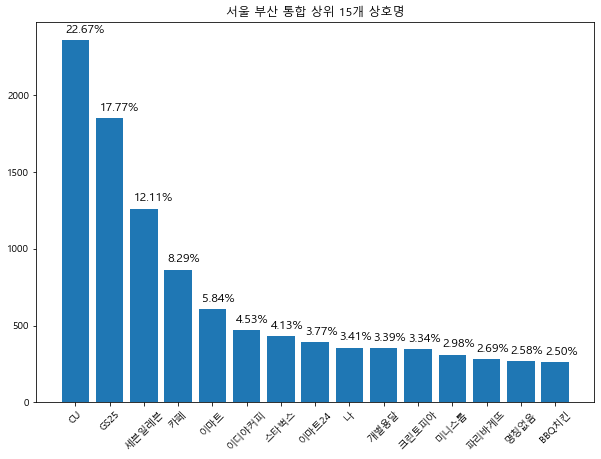

In [35]:
top15 = df_store_name.head(15).sort_values(by='개수',ascending=False)

plt.figure(figsize=(10,7))
plt.bar(x=top15.상호명,height=top15.개수)

for x_coord, y_coord in enumerate(top15.개수):
    plt.text(x_coord-0.3,y_coord+50,'{:.2f}%'.format(y_coord/sum(top15.개수)*100), fontsize=12)

plt.xticks(rotation=45)
plt.title('서울 부산 통합 상위 15개 상호명')
plt.show()

In [36]:
df[['상호명','도로명주소']]

,상호명,도로명주소
0,비지트,서울특별시 서초구 동광로18길 82
1,쓰리에프,서울특별시 동작구 동작대로27가길 12
2,채움,서울특별시 종로구 삼봉로 81
3,호구의주방,서울특별시 영등포구 선유로 269
4,다향,서울특별시 서초구 효령로 230
...,...,...
452590,일광카메라,부산광역시 중구 광복로 85
452591,파워씨마트,부산광역시 북구 모분재로 43
452592,철마청년협동조합,부산광역시 해운대구 센텀서로 20
452593,소금주방,부산광역시 수영구 무학로63번길 45-6


In [37]:
df[['상호명','도로명주소']].iloc[0:3]

,상호명,도로명주소
0,비지트,서울특별시 서초구 동광로18길 82
1,쓰리에프,서울특별시 동작구 동작대로27가길 12
2,채움,서울특별시 종로구 삼봉로 81


In [38]:
df[['상호명','도로명주소']].loc[0:3]

,상호명,도로명주소
0,비지트,서울특별시 서초구 동광로18길 82
1,쓰리에프,서울특별시 동작구 동작대로27가길 12
2,채움,서울특별시 종로구 삼봉로 81
3,호구의주방,서울특별시 영등포구 선유로 269


iloc, loc 이용하지 않고 df 데이터 프레임에서 상호명과 도로명주소 칼럼을 추출하였고, loc과 iloc을 이용해서 처음 3개의 행을 추출하였다

## 6. 기술 통계값 파악

In [39]:
df.describe()

,상가업소번호,지번본번지,건물본번지,구우편번호,신우편번호,경도,위도
count,4.525950e+05,452595.000000,452595.000000,452595.000000,452584.000000,452595.000000,452595.000000
mean,1.960954e+07,480.054422,143.559566,279789.184288,18047.157100,127.618627,36.826891
std,4.846655e+06,508.677492,264.580236,218016.274144,19621.475842,0.953961,1.093455
min,2.895874e+06,1.000000,0.000000,100011.000000,1000.000000,126.768169,35.006760
25%,1.626861e+07,116.000000,19.000000,134864.000000,4390.000000,126.960323,35.211022
50%,2.000576e+07,336.000000,47.000000,143747.000000,6662.000000,127.048516,37.508608
75%,2.431498e+07,682.000000,151.000000,604827.000000,46702.000000,128.996827,37.560396
max,2.852486e+07,9999.000000,3318.000000,619963.000000,49527.000000,129.292243,37.690787


In [40]:
df[['지번본번지','건물본번지']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452595 entries, 0 to 452594
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   지번본번지   452595 non-null  int64
 1   건물본번지   452595 non-null  int64
dtypes: int64(2)
memory usage: 6.9 MB


In [41]:
print('데이터 개수: 452595개')
print('데이터 타입: int64')
print('메모리 사용량: 6.9 MB')

데이터 개수: 452595개
데이터 타입: int64
메모리 사용량: 6.9 MB


## 7. 위도와 경도의 빈도표를 시각화 하기

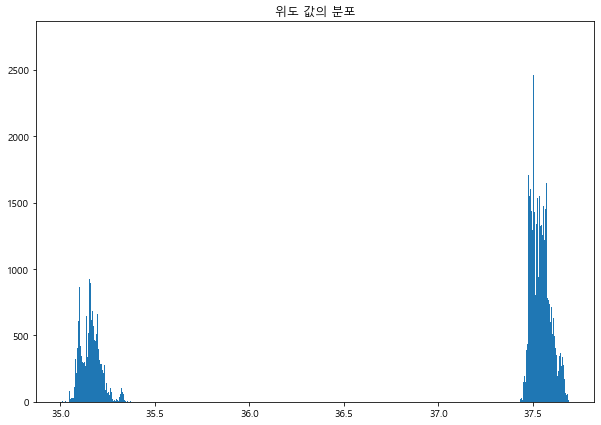

In [275]:
plt.figure(figsize=(10,7))
plt.hist(df.위도,bins=int(len(df.위도)*0.01))
plt.title('위도 값의 분포')
plt.show()

서울, 부산의 위도에 각각 군집되어 분포 하는 것을 볼 수 있다

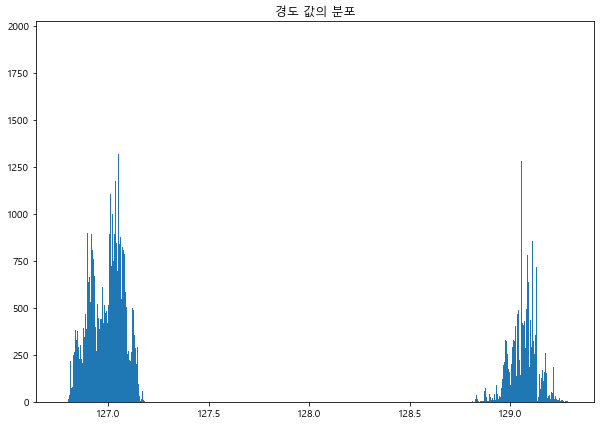

In [276]:
plt.figure(figsize=(10,7))
plt.hist(df.경도,bins=int(len(df.경도)*0.01))
plt.title('경도 값의 분포')
plt.show()

경도 값 또한 서울, 부산의 경도에 각각 군집되어 분포하는 것을 알 수 있다

## 8. 상관계수 조사 - 숫자 데이터 타입의 변수들만을 추출해 상관관계를 조사한다

In [42]:
dtype_list = [(df[col].dtype, col) for col in df.columns]
number_type_cols = [col[1] for col in dtype_list if col[0]=='int64' or col[0]=='float64']

In [43]:
df[number_type_cols].corr()

,상가업소번호,지번본번지,건물본번지,구우편번호,신우편번호,경도,위도
상가업소번호,1.000000,-0.007110,0.008577,0.029626,0.029202,0.029666,-0.028941
지번본번지,-0.007110,1.000000,0.048546,0.214202,0.216096,0.190310,-0.207301
건물본번지,0.008577,0.048546,1.000000,0.003744,0.001597,0.004260,0.000766
구우편번호,0.029626,0.214202,0.003744,1.000000,0.996512,0.993710,-0.997966
신우편번호,0.029202,0.216096,0.001597,0.996512,1.000000,0.988558,-0.997860
경도,0.029666,0.190310,0.004260,0.993710,0.988558,1.000000,-0.994441
위도,-0.028941,-0.207301,0.000766,-0.997966,-0.997860,-0.994441,1.000000


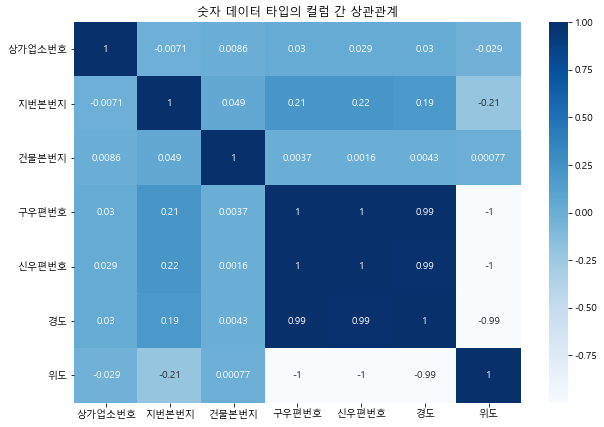

In [44]:
plt.figure(figsize=(10,7))
sns.heatmap(df[number_type_cols].corr(),annot=True,cmap='Blues')
plt.title('숫자 데이터 타입의 컬럼 간 상관관계')
plt.show()

## 9. 경도와 위도 칼럼을 이용하여 산점도 그리기

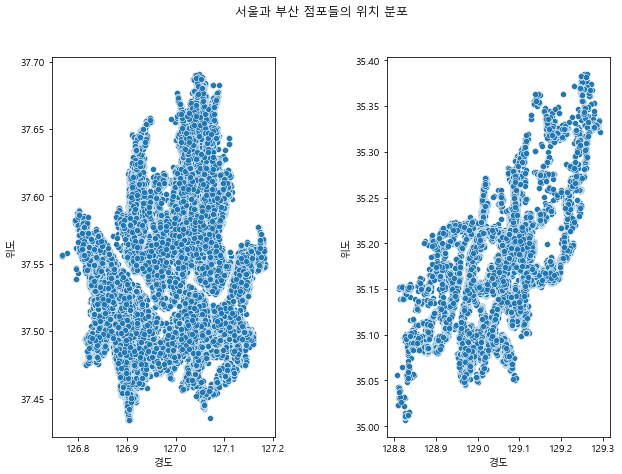

In [338]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.scatterplot(x='경도',y='위도',data=df_seoul)

plt.subplot(1,2,2)
sns.scatterplot(x='경도',y='위도',data=df_busan)

plt.suptitle('서울과 부산 점포들의 위치 분포')
plt.subplots_adjust(wspace=0.5)
plt.show()

## 10. 상권 업종 대분류명 별로 상호명의 개수 도출 하고 시각화

In [45]:
store_types = df['상권업종대분류명'].unique()

In [46]:
store_types

array(['음식', '소매', '학문/교육', '부동산', '관광/여가/오락', '생활서비스', '숙박', '스포츠'],
      dtype=object)

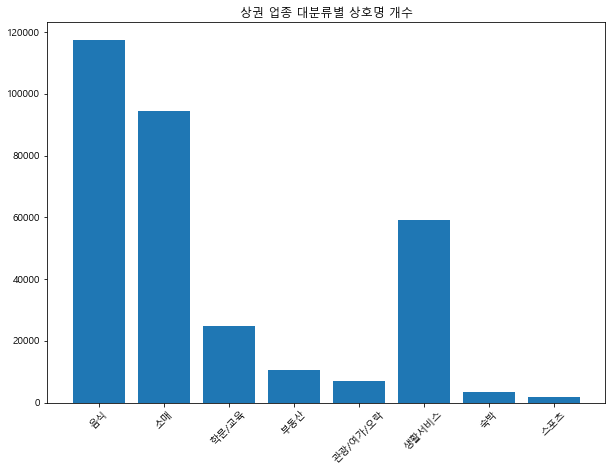

In [47]:
height_list = []

for s in store_types:
    height_list.append(len(df.loc[df.상권업종대분류명==s,'상호명'].unique()))

plt.figure(figsize=(10,7))
plt.bar(x=store_types,height=height_list)
plt.xticks(rotation=45)
plt.title('상권 업종 대분류별 상호명 개수')
plt.show()

## 11. 요식업 상권에 대한 분석

In [48]:
pd.options.display.max_columns = df.shape[1]
df_food = df[df.상권업종대분류명=='음식']
df_food.head()

,상가업소번호,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
0,17174175,비지트,음식,한식,한식/백반/한정식,서울특별시,서초구,방배4동,방배동,대지,854,서울특별시 서초구 방배동 854-18,서울특별시 서초구 동광로18길,82,1165010100108540018009586,서울특별시 서초구 동광로18길 82,137837,6572.0,126.991394,37.488375
1,17174119,쓰리에프,음식,한식,한식/백반/한정식,서울특별시,동작구,사당2동,사당동,대지,139,서울특별시 동작구 사당동 139-72,서울특별시 동작구 동작대로27가길,12,1159010700101390073009536,서울특별시 동작구 동작대로27가길 12,156816,7008.0,126.980952,37.487105
2,17174096,채움,음식,한식,한식/백반/한정식,서울특별시,종로구,종로1.2.3.4가동,수송동,대지,58,서울특별시 종로구 수송동 58,서울특별시 종로구 삼봉로,81,1111012400100580000017956,서울특별시 종로구 삼봉로 81,110858,3150.0,126.981794,37.572387
4,17174040,다향,음식,한식,한식/백반/한정식,서울특별시,서초구,서초3동,서초동,대지,1485,서울특별시 서초구 서초동 1485-3,서울특별시 서초구 효령로,230,1165010800114850004022127,서울특별시 서초구 효령로 230,137869,6709.0,127.009382,37.483436
11,17163092,도전최강달인왕만두,음식,한식,한식/백반/한정식,서울특별시,강동구,고덕2동,고덕동,대지,693,서울특별시 강동구 고덕동 693,서울특별시 강동구 고덕로,333,1174010200102170000018014,서울특별시 강동구 고덕로 333,134082,5224.0,127.159471,37.556197


In [63]:
df_food.loc[:,'상권업종중분류명'].value_counts()

한식         61639
커피점/카페     27074
유흥주점       18438
분식         15302
일식/수산물     13174
양식          9408
닭/오리요리      8409
제과제빵떡케익     6896
패스트푸드       6481
중식          5198
별식/퓨전요리     2764
부페           628
기타음식업        521
음식배달서비스      137
Name: 상권업종중분류명, dtype: int64

loc 함수를 이용하여 상권업종중분류명 빈도수를 구함

In [64]:
df_food['상권업종중분류명'].value_counts()

한식         61639
커피점/카페     27074
유흥주점       18438
분식         15302
일식/수산물     13174
양식          9408
닭/오리요리      8409
제과제빵떡케익     6896
패스트푸드       6481
중식          5198
별식/퓨전요리     2764
부페           628
기타음식업        521
음식배달서비스      137
Name: 상권업종중분류명, dtype: int64

loc 함수를 이용하여 상권업종중분류명 빈도수를 구함

## 12. 서울시 상권업종중분류명 별 분석

In [75]:
df_seoul_food = df_food.loc[df_food.시도명=='서울특별시']
df_seoul_food.index = range(len(df_seoul_food.index))
df_seoul_food.head()

,상가업소번호,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,대지구분명,지번본번지,지번주소,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
0,17174175,비지트,음식,한식,한식/백반/한정식,서울특별시,서초구,방배4동,방배동,대지,854,서울특별시 서초구 방배동 854-18,서울특별시 서초구 동광로18길,82,1165010100108540018009586,서울특별시 서초구 동광로18길 82,137837,6572.0,126.991394,37.488375
1,17174119,쓰리에프,음식,한식,한식/백반/한정식,서울특별시,동작구,사당2동,사당동,대지,139,서울특별시 동작구 사당동 139-72,서울특별시 동작구 동작대로27가길,12,1159010700101390073009536,서울특별시 동작구 동작대로27가길 12,156816,7008.0,126.980952,37.487105
2,17174096,채움,음식,한식,한식/백반/한정식,서울특별시,종로구,종로1.2.3.4가동,수송동,대지,58,서울특별시 종로구 수송동 58,서울특별시 종로구 삼봉로,81,1111012400100580000017956,서울특별시 종로구 삼봉로 81,110858,3150.0,126.981794,37.572387
3,17174040,다향,음식,한식,한식/백반/한정식,서울특별시,서초구,서초3동,서초동,대지,1485,서울특별시 서초구 서초동 1485-3,서울특별시 서초구 효령로,230,1165010800114850004022127,서울특별시 서초구 효령로 230,137869,6709.0,127.009382,37.483436
4,17163092,도전최강달인왕만두,음식,한식,한식/백반/한정식,서울특별시,강동구,고덕2동,고덕동,대지,693,서울특별시 강동구 고덕동 693,서울특별시 강동구 고덕로,333,1174010200102170000018014,서울특별시 강동구 고덕로 333,134082,5224.0,127.159471,37.556197


In [154]:
food_gu = df_seoul_food[['시군구명','상권업종중분류명']].value_counts().reset_index()
food_gu.columns = ['시군구명','상권업종중분류명','점포수']

In [155]:
food_gu_pivoted = food_gu.pivot_table(index='시군구명', columns='상권업종중분류명',values='점포수')
food_gu_pivoted

상권업종중분류명,기타음식업,닭/오리요리,별식/퓨전요리,부페,분식,양식,유흥주점,음식배달서비스,일식/수산물,제과제빵떡케익,중식,커피점/카페,패스트푸드,한식
시군구명,,,,,,,,,,,,,,
강남구,37.0,367.0,182.0,50.0,856.0,1326.0,938.0,10.0,1012.0,525.0,340.0,2434.0,511.0,4135.0
강동구,5.0,264.0,105.0,29.0,488.0,169.0,587.0,3.0,369.0,245.0,112.0,795.0,238.0,1772.0
강북구,4.0,185.0,66.0,7.0,317.0,73.0,431.0,2.0,179.0,121.0,56.0,328.0,118.0,1402.0
강서구,15.0,298.0,104.0,21.0,529.0,376.0,719.0,2.0,457.0,263.0,168.0,1070.0,236.0,2135.0
관악구,13.0,302.0,91.0,13.0,547.0,323.0,761.0,3.0,351.0,183.0,142.0,750.0,203.0,1705.0
광진구,7.0,238.0,78.0,13.0,451.0,241.0,484.0,1.0,339.0,185.0,155.0,797.0,181.0,1399.0
구로구,7.0,272.0,96.0,21.0,435.0,113.0,676.0,4.0,252.0,154.0,256.0,633.0,176.0,1520.0
금천구,9.0,173.0,83.0,13.0,298.0,83.0,396.0,1.0,192.0,116.0,121.0,482.0,102.0,1126.0
노원구,11.0,296.0,75.0,12.0,423.0,137.0,431.0,6.0,232.0,204.0,110.0,622.0,223.0,1265.0


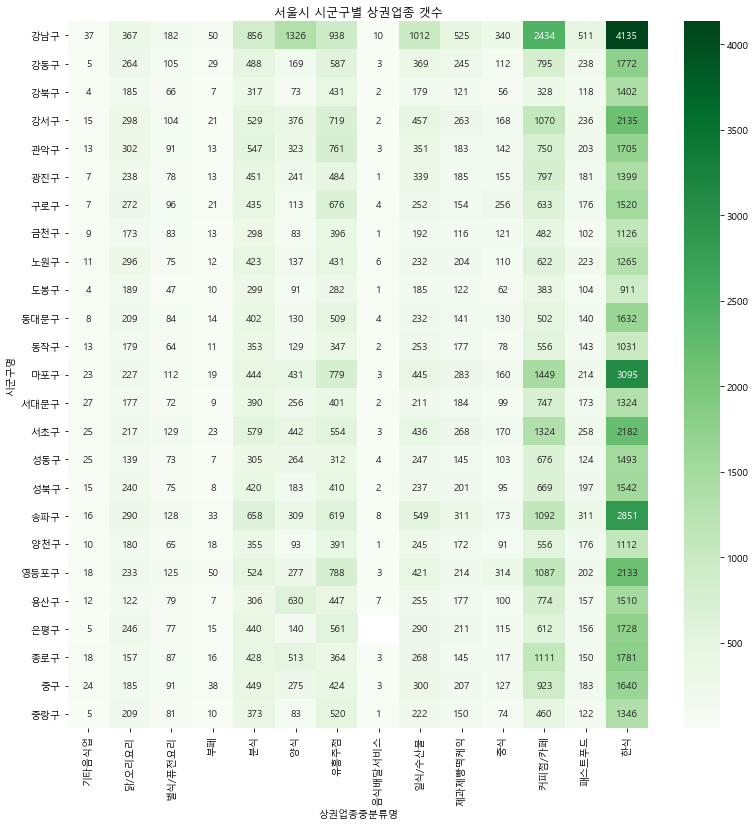

In [156]:
plt.figure(figsize=(13,13))
sns.heatmap(food_gu_pivoted,
           cmap='Greens',
           annot=True,
           fmt='g')
plt.title('서울시 시군구별 상권업종 갯수')
plt.show()

In [157]:
food_gu_pivoted_gangnam = food_gu_pivoted[food_gu_pivoted.index=='강남구'].reset_index()

In [158]:
food_gu_pivoted_gangnam_new = food_gu_pivoted_gangnam.melt(id_vars='시군구명',value_name='점포수')
food_gu_pivoted_gangnam_new =food_gu_pivoted_gangnam_new.sort_values(by='점포수',ascending=False)

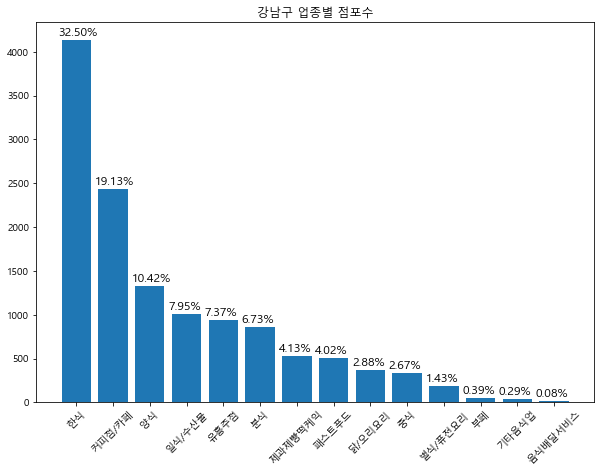

In [159]:
plt.figure(figsize=(10,7))
plt.bar(x=food_gu_pivoted_gangnam_new['상권업종중분류명'],height=food_gu_pivoted_gangnam_new['점포수'])

for x_coord, y_coord in enumerate(food_gu_pivoted_gangnam_new.점포수):
    plt.text(x_coord-0.5,y_coord+50,'{:.2f}%'.format(y_coord/sum(food_gu_pivoted_gangnam_new.점포수)*100),fontsize=12)

plt.xticks(rotation=45)
plt.title('강남구 업종별 점포수')
plt.show()

matplotlib을 이용하여 바차트 출력

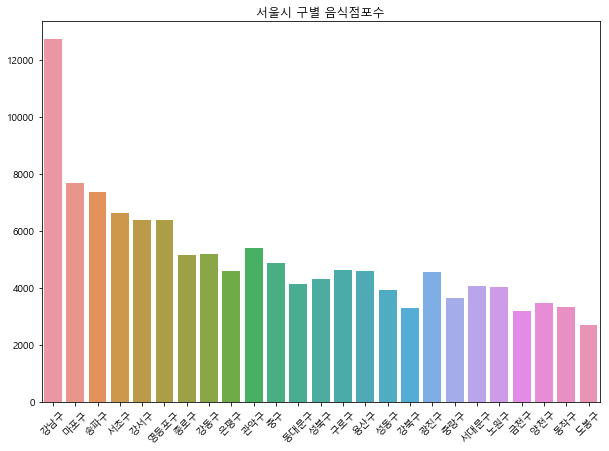

In [191]:
restaurants_by_gu = []
gu_names = food_gu.시군구명.unique()

for fg in gu_names:
    restaurants =sum(food_gu.loc[food_gu.시군구명==fg,'점포수'])
    restaurants_by_gu.append(restaurants)

plt.figure(figsize=(10,7))
sns.barplot(x=gu_names, y=restaurants_by_gu)
plt.xticks(rotation=45)
plt.title('서울시 구별 음식점포수')
plt.show()

서울시 구별 음식점 점포수를 바차트로 시각화

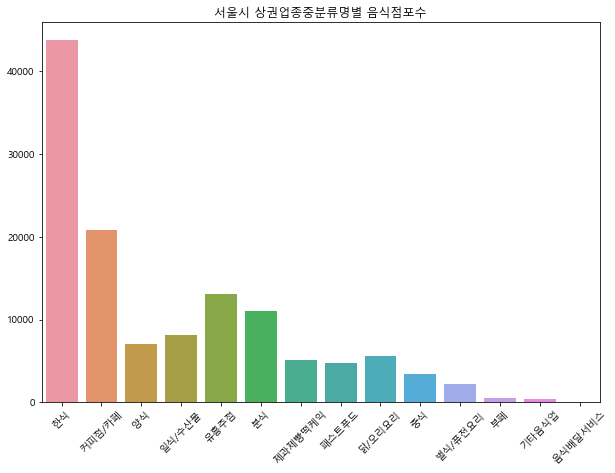

In [206]:
restaurants_by_types = []
type_names = food_gu.상권업종중분류명.unique()

for fg in type_names:
    restaurants = sum(food_gu.loc[food_gu.상권업종중분류명==fg,'점포수'])
    restaurants_by_types.append(restaurants)

plt.figure(figsize=(10,7))
sns.barplot(x=type_names, y=restaurants_by_types)
plt.xticks(rotation=45)
plt.title('서울시 상권업종중분류명별 음식점포수')
plt.show()

In [455]:
food_grouped_by_county = food_gu.groupby(['시군구명','상권업종중분류명']).sum('점포수').reset_index()

In [461]:
food_grouped_by_county.pivot_table()


,시군구명,상권업종중분류명,점포수
0,강남구,기타음식업,37
1,강남구,닭/오리요리,367
2,강남구,별식/퓨전요리,182
3,강남구,부페,50
4,강남구,분식,856
...,...,...,...
344,중랑구,제과제빵떡케익,150
345,중랑구,중식,74
346,중랑구,커피점/카페,460
347,중랑구,패스트푸드,122


In [459]:
food_grouped_by_county.상권업종중분류명

0        기타음식업
1       닭/오리요리
2      별식/퓨전요리
3           부페
4           분식
        ...   
344    제과제빵떡케익
345         중식
346     커피점/카페
347      패스트푸드
348         한식
Name: 상권업종중분류명, Length: 349, dtype: object

<Figure size 1440x1440 with 0 Axes>

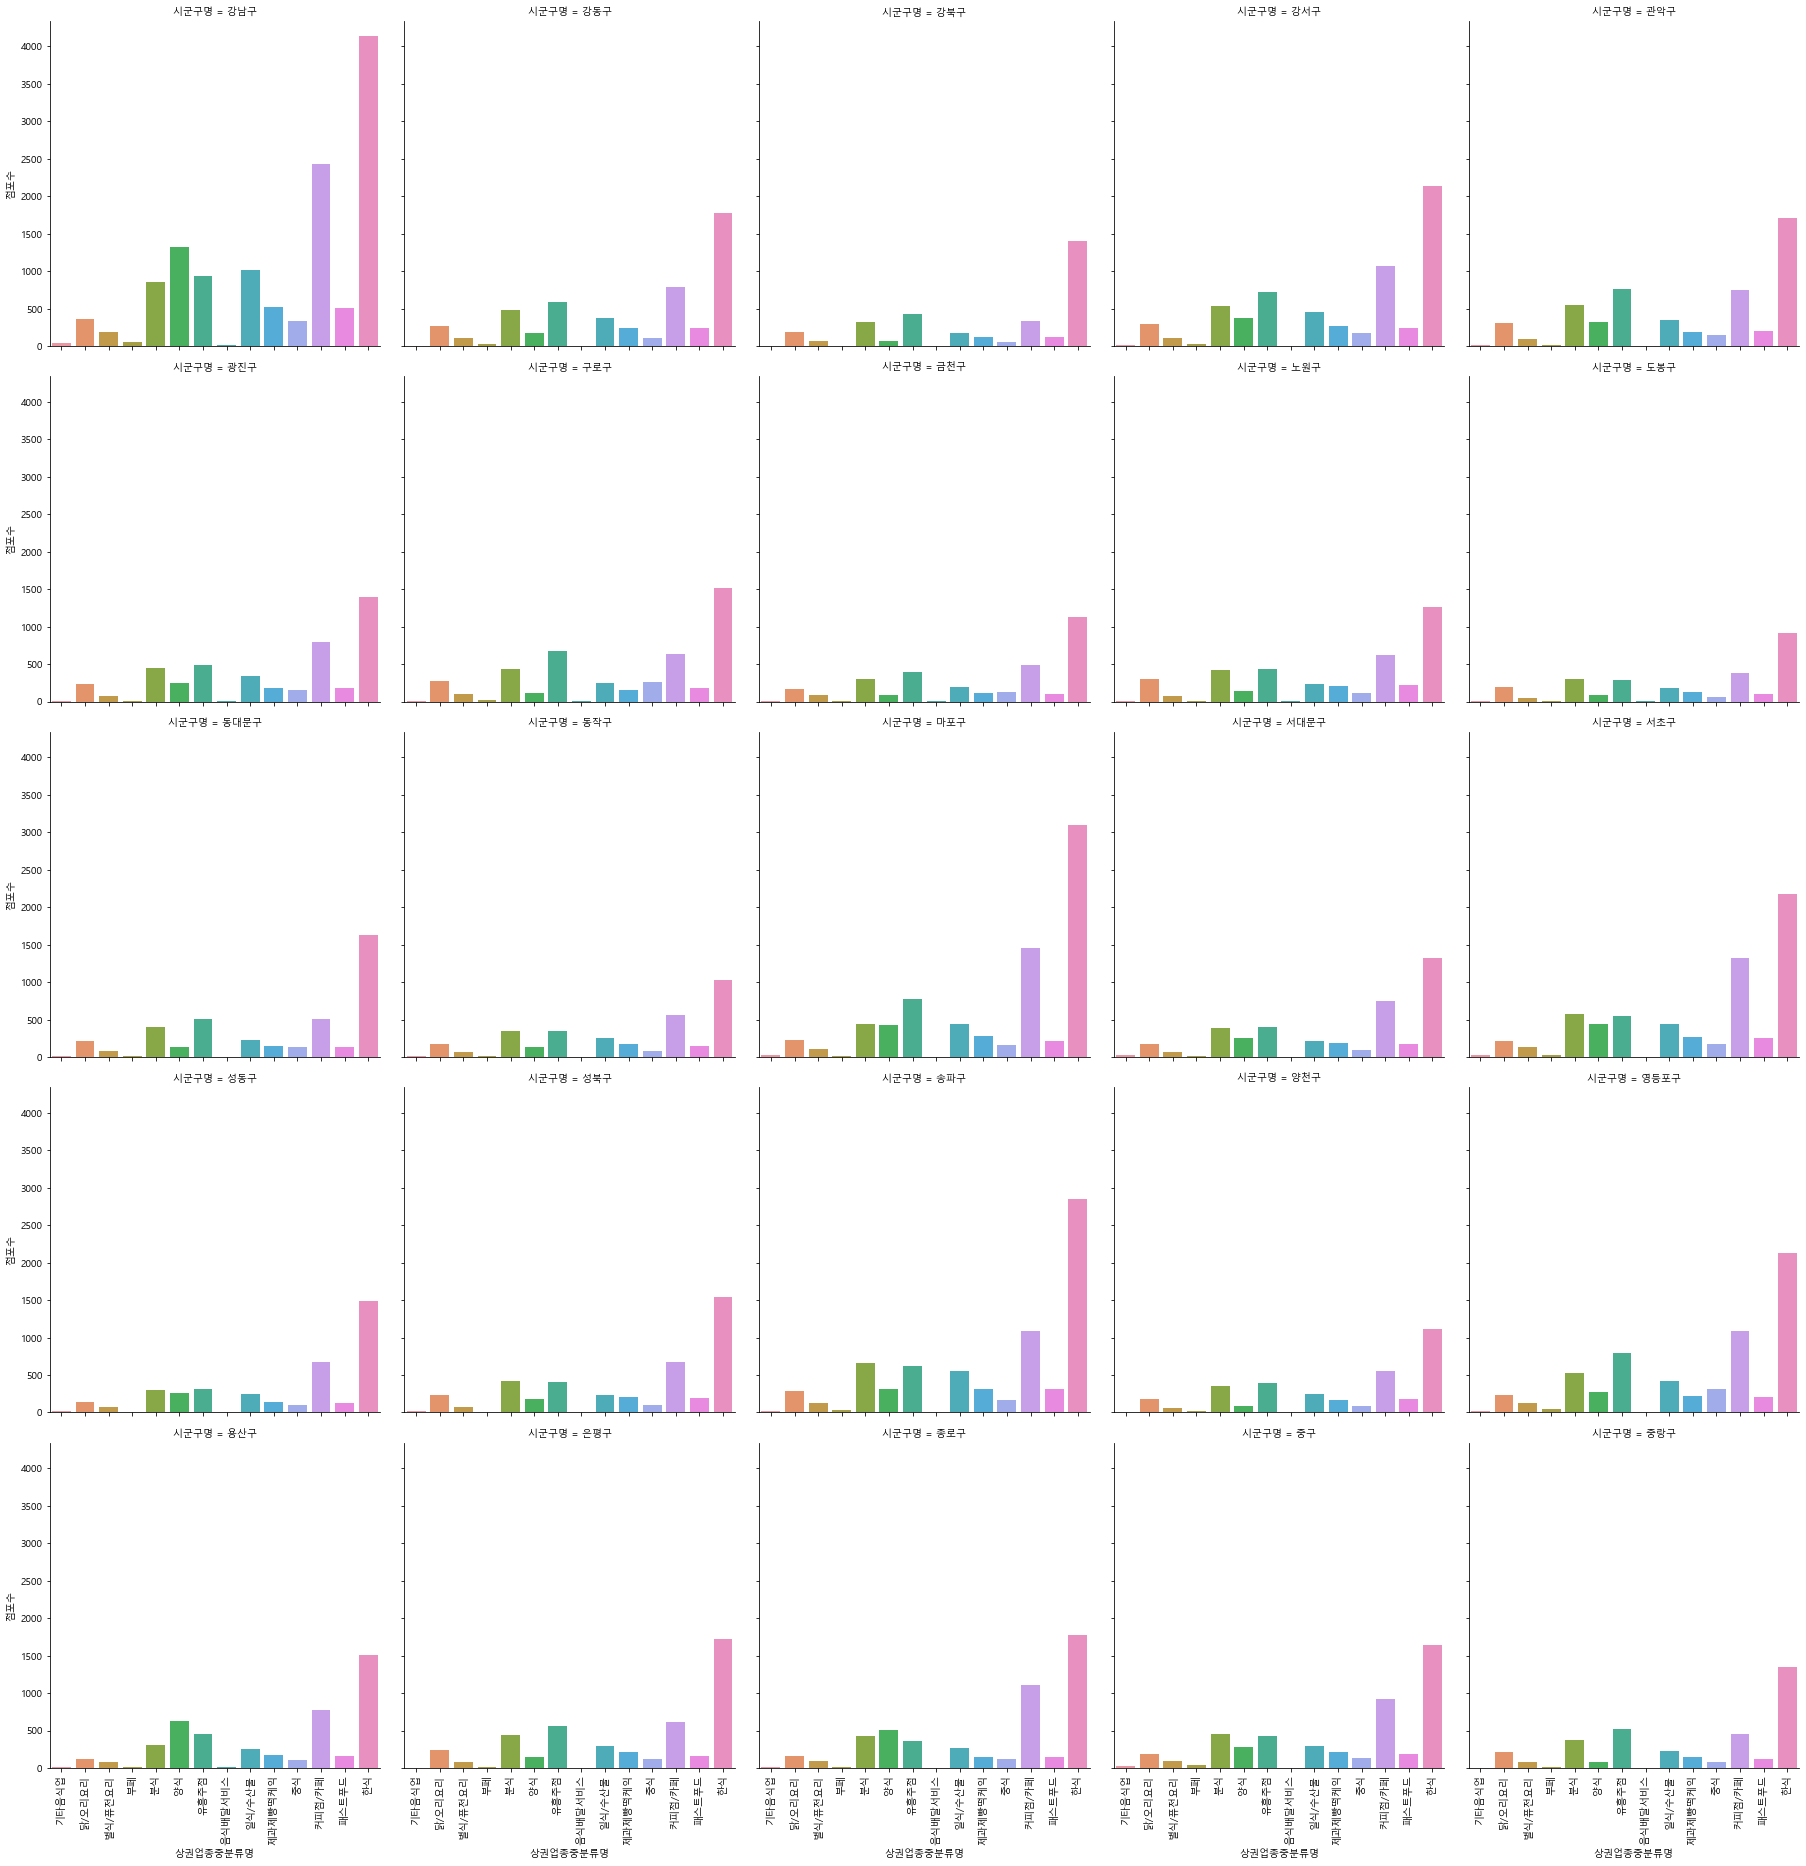

In [498]:
plt.figure(figsize=(20,20))
chart = sns.catplot(x='상권업종중분류명',y='점포수',data=food_grouped_by_county,kind='bar',col='시군구명',col_wrap=5)
chart.set_xticklabels(rotation=90)
plt.show()

업종별 점포의 수를 지역구에 따라 나눠 바차트를 그렸다

<Figure size 1440x1080 with 0 Axes>

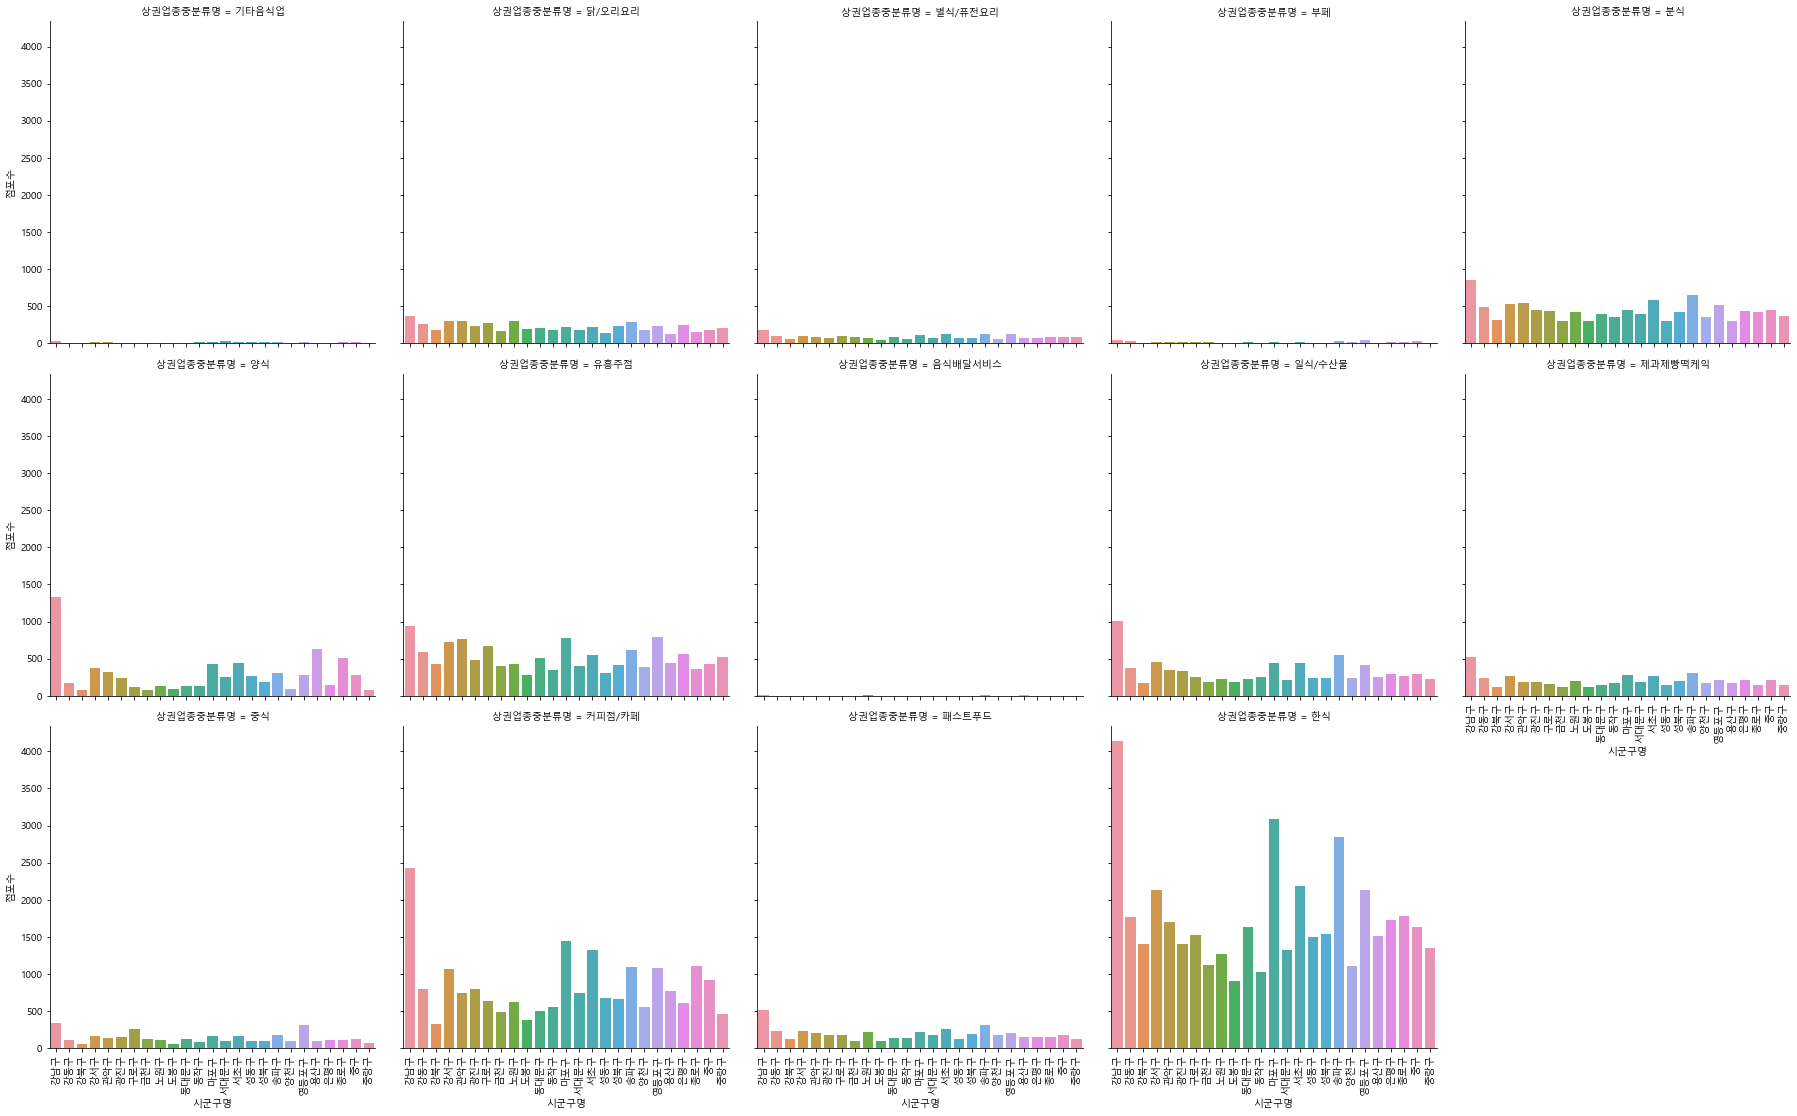

In [501]:
plt.figure(figsize=(20,15))
chart = sns.catplot(x='시군구명',y='점포수',data=food_grouped_by_county,kind='bar',col='상권업종중분류명',col_wrap=5)
chart.set_xticklabels(rotation=90)
plt.show()

지역구별 점포의 수를 업종에 따라 바차트를 나누어 그렸다

## 13. 서울 학원 상권 분석

In [305]:
df_academy = df_seoul[df_seoul.상권업종대분류명=='학문/교육']

In [314]:
df_academy.상호명.value_counts()

학원             136
공부방             63
해법수학            36
카페              31
뮤엠영어            30
              ... 
탑스타방송아카데미        1
심규민과학교습소         1
알면쉽다연세수학교습소      1
좋은영어교습소          1
씨엠에스학원           1
Name: 상호명, Length: 18358, dtype: int64

학원 상호명 별 빈도수

In [332]:
df_academy.상호명.value_counts().head(10)

학원         136
공부방         63
해법수학        36
카페          31
뮤엠영어        30
윤선생영어교실     27
삼성영어        24
해법영어교실      16
경희대태권도      15
튼튼영어        13
Name: 상호명, dtype: int64

학원 상호명 별 상위 빈도수 10개

In [331]:
df_academy.시군구명.value_counts(ascending=False)

강남구     2116
서초구     1408
송파구     1341
양천구     1254
노원구     1174
강동구     1089
강서구     1057
관악구      981
은평구      925
성북구      917
광진구      912
구로구      874
동작구      767
마포구      747
영등포구     728
도봉구      691
중랑구      684
동대문구     628
서대문구     554
금천구      532
성동구      520
종로구      447
강북구      429
용산구      350
중구       301
Name: 시군구명, dtype: int64

시군구별 학원 수

In [338]:
academy_count = df_academy.상권업종소분류명.value_counts(ascending=False).head(30)

In [339]:
academy_count

학원-입시          4723
어린이집           3143
학원(종합)         2891
학원-외국어/어학      2382
피아노/바이올린/기타    2011
서예/서화/미술       1044
학원-기타           892
독서실             742
고시원             706
태권도장            501
학습지보급           297
학원-어린이영어        213
학원-스포츠/재즈댄스     171
학원-무용           170
컴퓨터학원           159
학원-주산암산부기속셈      82
유아교육기관기타         80
검도도장             78
합기도장             76
놀이방              71
학원-간호조무사         57
학원-요리            57
학원-미용            56
실내놀이터-유아         54
운동/코치학교          51
학원-공예            49
학원-배우/탤런트        44
학원/국가고시          36
유도장              35
학원-국악            32
Name: 상권업종소분류명, dtype: int64

서울 시내 학원 종류/업종별 top30

In [342]:
academy_count_1000 = academy_count[academy_count >= 1000]

In [355]:
academy_group  = df_academy.pivot_table(index=['시군구명','상권업종소분류명'],values='상호명',aggfunc='count')
academy_group

상호명
시군구명 상권업종소분류명        
강남구  검도도장           6
     고시원           78
     놀이방            4
     독서실           78
     서예/서화/미술     107
...               ...
중랑구  학원-웅변          2
     학원-입시        130
     학원-주산암산부기속셈    6
     학원-펜글씨/한문      1
     합기도장           2

[1015 rows x 1 columns]

서울시내 지역구별, 업종별 상호명 갯수

In [358]:
academy_group.loc['강남구']

,상호명
상권업종소분류명,
검도도장,6
고시원,78
놀이방,4
독서실,78
서예/서화/미술,107
...,...
학원-펜글씨/한문,1
학원-편입,4
학원-피부미용,4


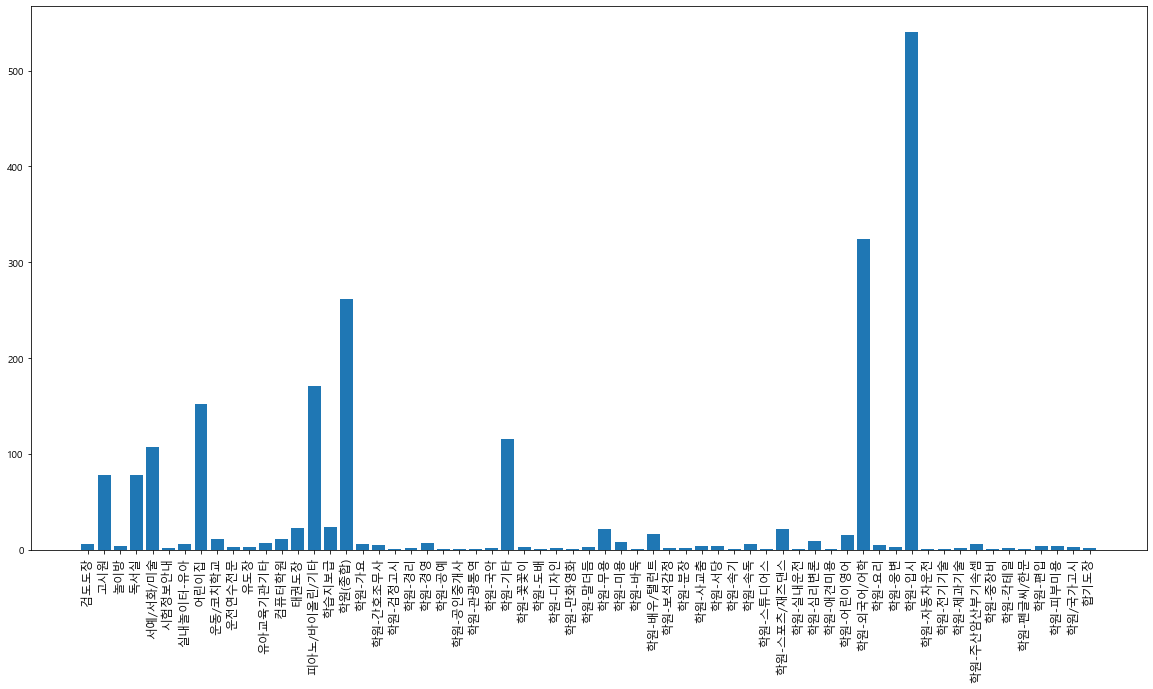

In [364]:
plt.figure(figsize=(20,10))
plt.bar(x=academy_group.loc['강남구'].index,height=academy_group.loc['강남구']['상호명'])
plt.xticks(rotation=90,fontsize=12)
plt.show()

강남구 내 학원 업종 별 갯수 + 바 차트 시각화 

In [393]:
df_academy_gangnam = df_academy[(df_academy.법정동명=='목동') | (df_academy.법정동명=='대치동')]

df_academy_gangnam.상권업종소분류명.value_counts()

학원-입시          486
학원-외국어/어학      199
학원(종합)         128
서예/서화/미술        68
피아노/바이올린/기타     65
학원-기타           64
어린이집            60
독서실             33
고시원             24
학습지보급           14
태권도장             9
학원-무용            9
학원-스포츠/재즈댄스      6
컴퓨터학원            6
학원-속독            5
학원-웅변            4
학원-가요            3
학원-주산암산부기속셈      3
학원-국악            3
검도도장             3
합기도장             2
유도장              2
유아교육기관기타         2
학원-서당            2
운동/코치학교          2
학원-펜글씨/한문        2
학원-어린이영어         2
학원-자동차운전         2
학원-배우/탤런트        1
학원-미용            1
놀이방              1
학원-공예            1
학원-검정고시          1
학원-사교춤           1
학원-심리변론          1
운전연수전문           1
이동도서관운영          1
학원-기억법           1
시험정보안내           1
학원-실내운전          1
Name: 상권업종소분류명, dtype: int64

In [424]:
g = df_academy_gangnam.pivot_table(index=['시군구명','상권업종소분류명'],values='상호명',aggfunc='count').reset_index()
g.columns = ['시군구명','상권업종소분류명','학원수']
g

,시군구명,상권업종소분류명,학원수
0,강남구,검도도장,2
1,강남구,고시원,16
2,강남구,독서실,17
3,강남구,서예/서화/미술,42
4,강남구,시험정보안내,1
...,...,...,...
57,양천구,학원-외국어/어학,97
58,양천구,학원-웅변,2
59,양천구,학원-입시,203
60,양천구,학원-자동차운전,1


In [425]:
g_new = g[g.상권업종소분류명=='학원-입시']
g_new

,시군구명,상권업종소분류명,학원수
29,강남구,학원-입시,283
59,양천구,학원-입시,203


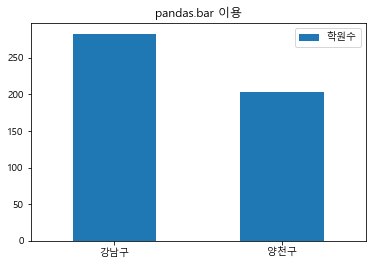

In [426]:
g_new.plot(kind='bar')
plt.xticks([0,1],['강남구','양천구'],rotation=0)
plt.title('pandas.bar 이용')
plt.show()

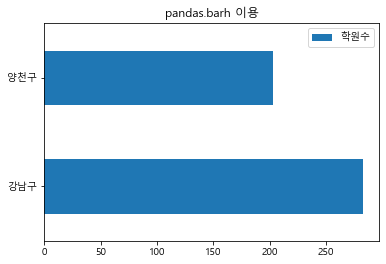

In [427]:
g_new.plot(kind='barh')
plt.yticks([0,1],['강남구','양천구'],rotation=0)
plt.title('pandas.barh 이용')
plt.show()

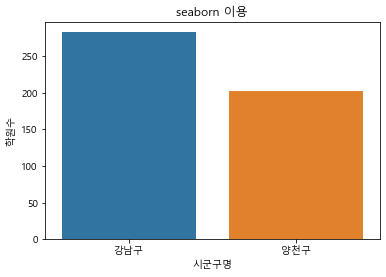

In [428]:
sns.barplot(x=g_new.시군구명, y = g_new.학원수)
plt.title('seaborn 이용')
plt.show()

## 14. 서울시 데이터 위도와 경도를 산점도로 시각화 

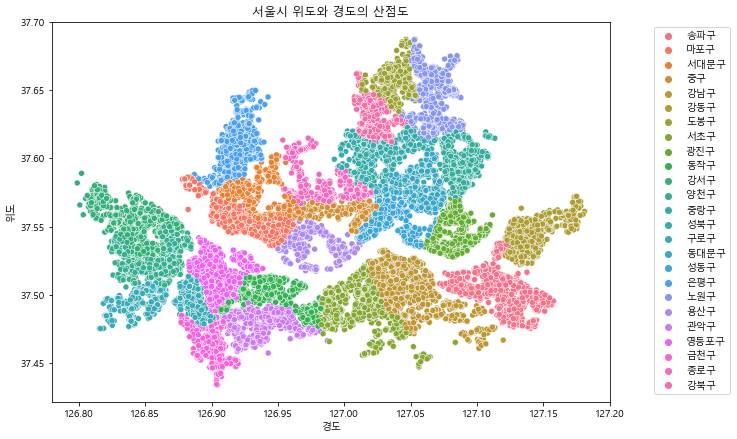

In [502]:
plt.figure(figsize=(10,7))

seoul_loc = df_academy[['시군구명','위도','경도']]
sns.scatterplot(x=seoul_loc.경도,y=seoul_loc.위도,hue=seoul_loc.시군구명)
plt.legend(bbox_to_anchor=(1.07,1))
plt.title('서울시 위도와 경도의 산점도')
plt.savefig('data/서울시 위도와 경도의 산점도')

In [441]:
g[g.상권업종소분류명=='학원-입시']

,시군구명,상권업종소분류명,학원수
29,강남구,학원-입시,283
59,양천구,학원-입시,203


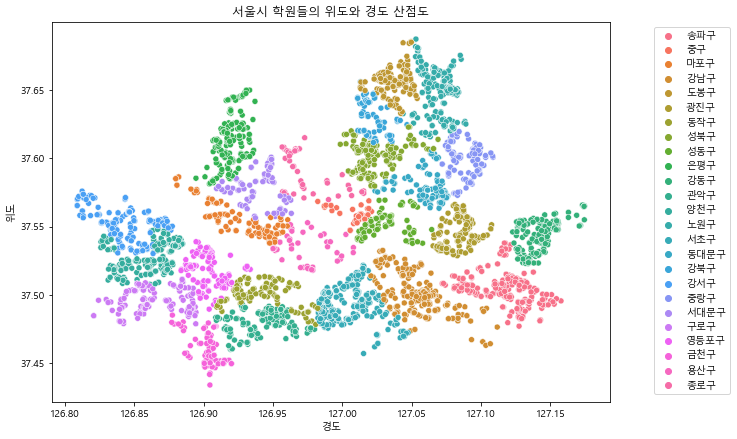

In [503]:
seoul_academy_loc = df_academy.loc[df_academy.상권업종소분류명 == '학원-입시',['시군구명','위도','경도']]

plt.figure(figsize=(10,7))
sns.scatterplot(x=seoul_academy_loc.경도,y=seoul_academy_loc.위도,hue=seoul_academy_loc.시군구명)
plt.legend(bbox_to_anchor=(1.07,1))
plt.title('서울시 학원들의 위도와 경도 산점도')
plt.savefig('data/서울시 학원들의 위도와 경도 산점도')

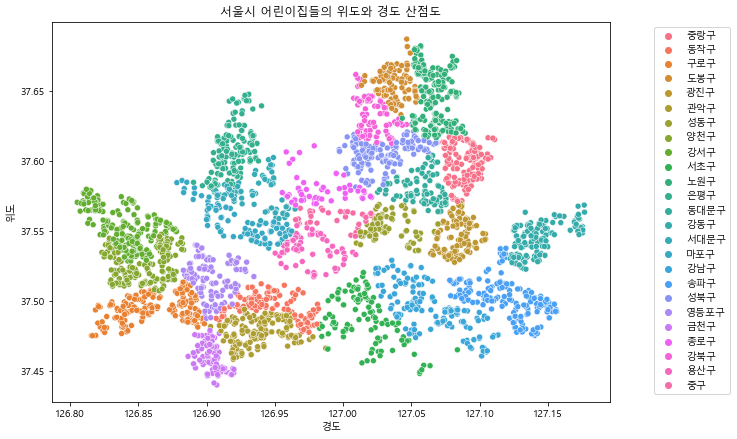

In [445]:
seoul_kids_loc = df_academy.loc[df_academy.상권업종소분류명 == '어린이집',['시군구명','위도','경도']]

plt.figure(figsize=(10,7))
sns.scatterplot(x=seoul_kids_loc.경도,y=seoul_kids_loc.위도,hue=seoul_kids_loc.시군구명)
plt.legend(bbox_to_anchor=(1.07,1))
plt.title('서울시 어린이집들의 위도와 경도 산점도')
seoul_academy_loc = df_academy.loc[df_academy.상권업종소분류명 == '학원-입시',['시군구명','위도','경도']]
plt.show()

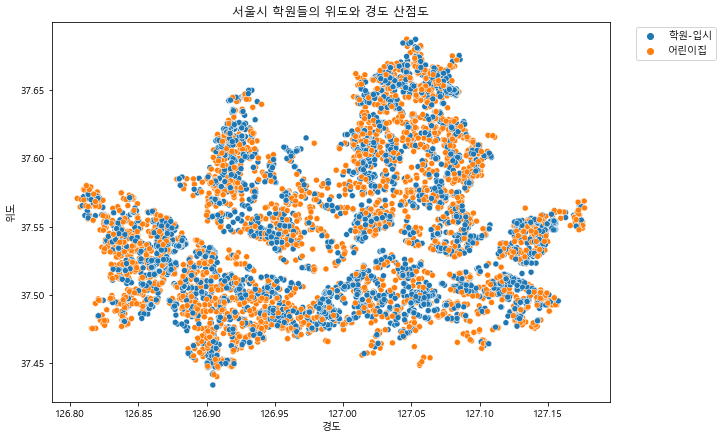

In [452]:
seoul_academy_kids = df_academy.loc[(df_academy.상권업종소분류명 == '어린이집') | (df_academy.상권업종소분류명 == '학원-입시')]


plt.figure(figsize=(10,7))
sns.scatterplot(x=seoul_academy_kids.경도,y=seoul_academy_kids.위도,hue=seoul_academy_kids.상권업종소분류명)
plt.legend(bbox_to_anchor=(1.20,1))
plt.title('서울시 학원들의 위도와 경도 산점도')
plt.show()